<a href="https://colab.research.google.com/github/nathan-pham/python-notebook/blob/main/fast_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import modules & log tensorflow version

In [ ]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("tensorflow version", tf.__version__)
print("tensorflow_hub version", hub.__version__)


tensorflow version 2.4.1
tensorflow_hub version 0.12.0


image utility functions

In [ ]:
def crop_image(image):
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2

    new_image = tf.image.crop_to_bounding_box(image, offset_y, offset_x, new_shape, new_shape)
    return new_image

@functools.lru_cache(maxsize=None)
def load_image(image_path, image_size=(256, 256), preserve_aspect_ratio=True):
    image = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
    # image = plt.imread(image_path).astype(np.float32)[:,:,:3]

    if image.max() > 1.0:
        image = image / 255.
    if len(image.shape) == 3:
        image = tf.stack([ image, image, image ], axis=-1)

    # image = crop_image(image)
    image = tf.image.resize(image, image_size, preserve_aspect_ratio=True)
    return image

def show_n(images, titles=('',)):
    n = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * n, w))
    gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)

    for i in range(n):
        plt.subplot(gs[i])
        plt.imshow(images[i][0], aspect="equal")
        plt.axis("off")
        plt.title(titles[i] if len(titles) > i else '')

    plt.show()


output image

In [ ]:
style_img_size = (256, 256)
content_img_size = (500, 500)

content_img = load_image("./imgs/resized-drawing-square-bg.jpg", content_img_size)
style_img = load_image("./imgs/zapista-landscape.jpg", style_img_size)

processed_style_img = tf.nn.avg_pool(style_img, ksize=[3,3], strides=[1,1], padding="SAME")

load hub

In [ ]:
hub_module = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
outputs = hub_module(tf.constant(content_img), tf.constant(processed_style_img))
output_img = outputs[0]

display results

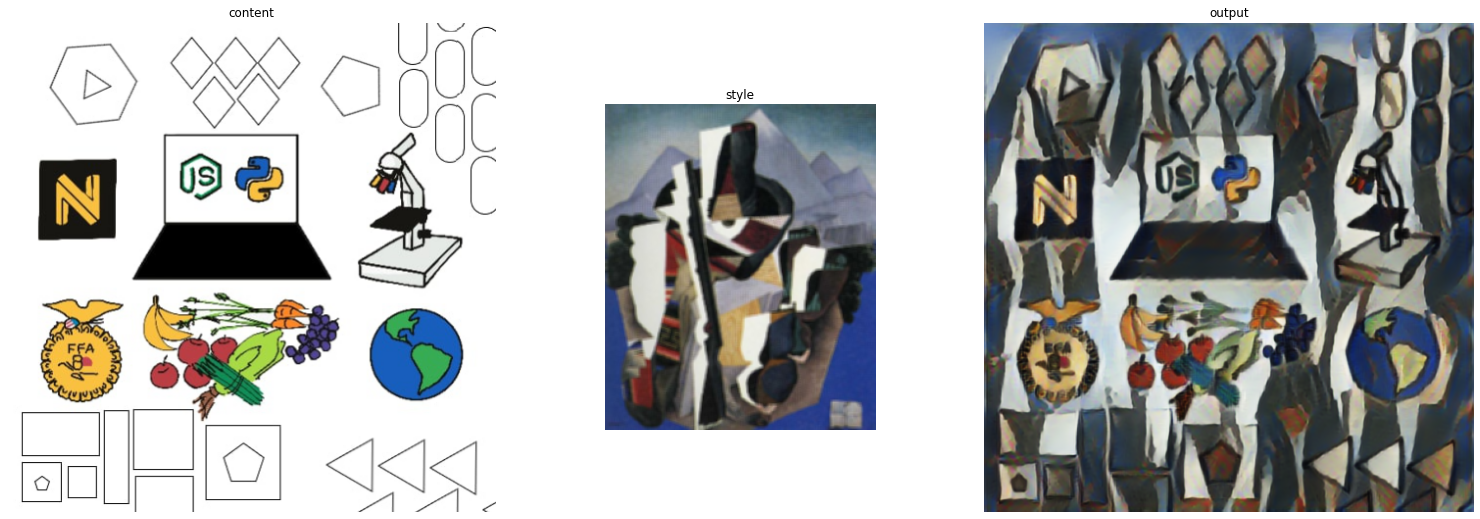

In [ ]:
show_n([content_img, processed_style_img, output_img], ["content", "style", "output"])